In [34]:
import datetime
import sys, os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [35]:
import scanpy as sc
sc.logging.print_memory_usage()
sc.settings.verbosity = 2
sc.settings.set_figure_params(dpi = 300, dpi_save = 300)
sc.logging.print_header()

from matplotlib.pyplot import rc_context

Memory usage: current 0.04 GB, difference -0.15 GB
scanpy==1.10.1 anndata==0.10.7 umap==0.5.5 numpy==1.26.4 scipy==1.13.0 pandas==2.2.2 scikit-learn==1.4.2 statsmodels==0.14.1 igraph==0.11.4 pynndescent==0.5.12


In [36]:
# add the utility functions folder to PATH
sys.path.append(os.path.abspath("../packages"))
from db_dev.helper import *

In [37]:
home_dir = os.path.expanduser("~")
current_directory = os.getcwd()

adata = sc.read_h5ad(current_directory+"/backups/neutrophils_umap_32719x37733_241027_15h56.h5ad")

In [38]:
#Loading obs
current_directory = os.getcwd()
# overwrite obs with the most recent version
filename = current_directory+"/backups/neutrophils_clustering_leiden_1.0_sub_obs_32719x28_241028_09h12.npz"
encoding = "latin1"

with np.load(filename, encoding=encoding, allow_pickle = True) as f:
    obs = pd.DataFrame(**f)

In [39]:
# loading obs onto adata
adata.obs["leiden_1.0_sub"] = obs["leiden_1.0_sub"]
# loading obs onto adata
adata.obs["leiden_1.0"] = obs["leiden_1.0"]

In [40]:
adata.layers["counts"]

<32719x37733 sparse matrix of type '<class 'numpy.float32'>'
	with 33968856 stored elements in Compressed Sparse Row format>

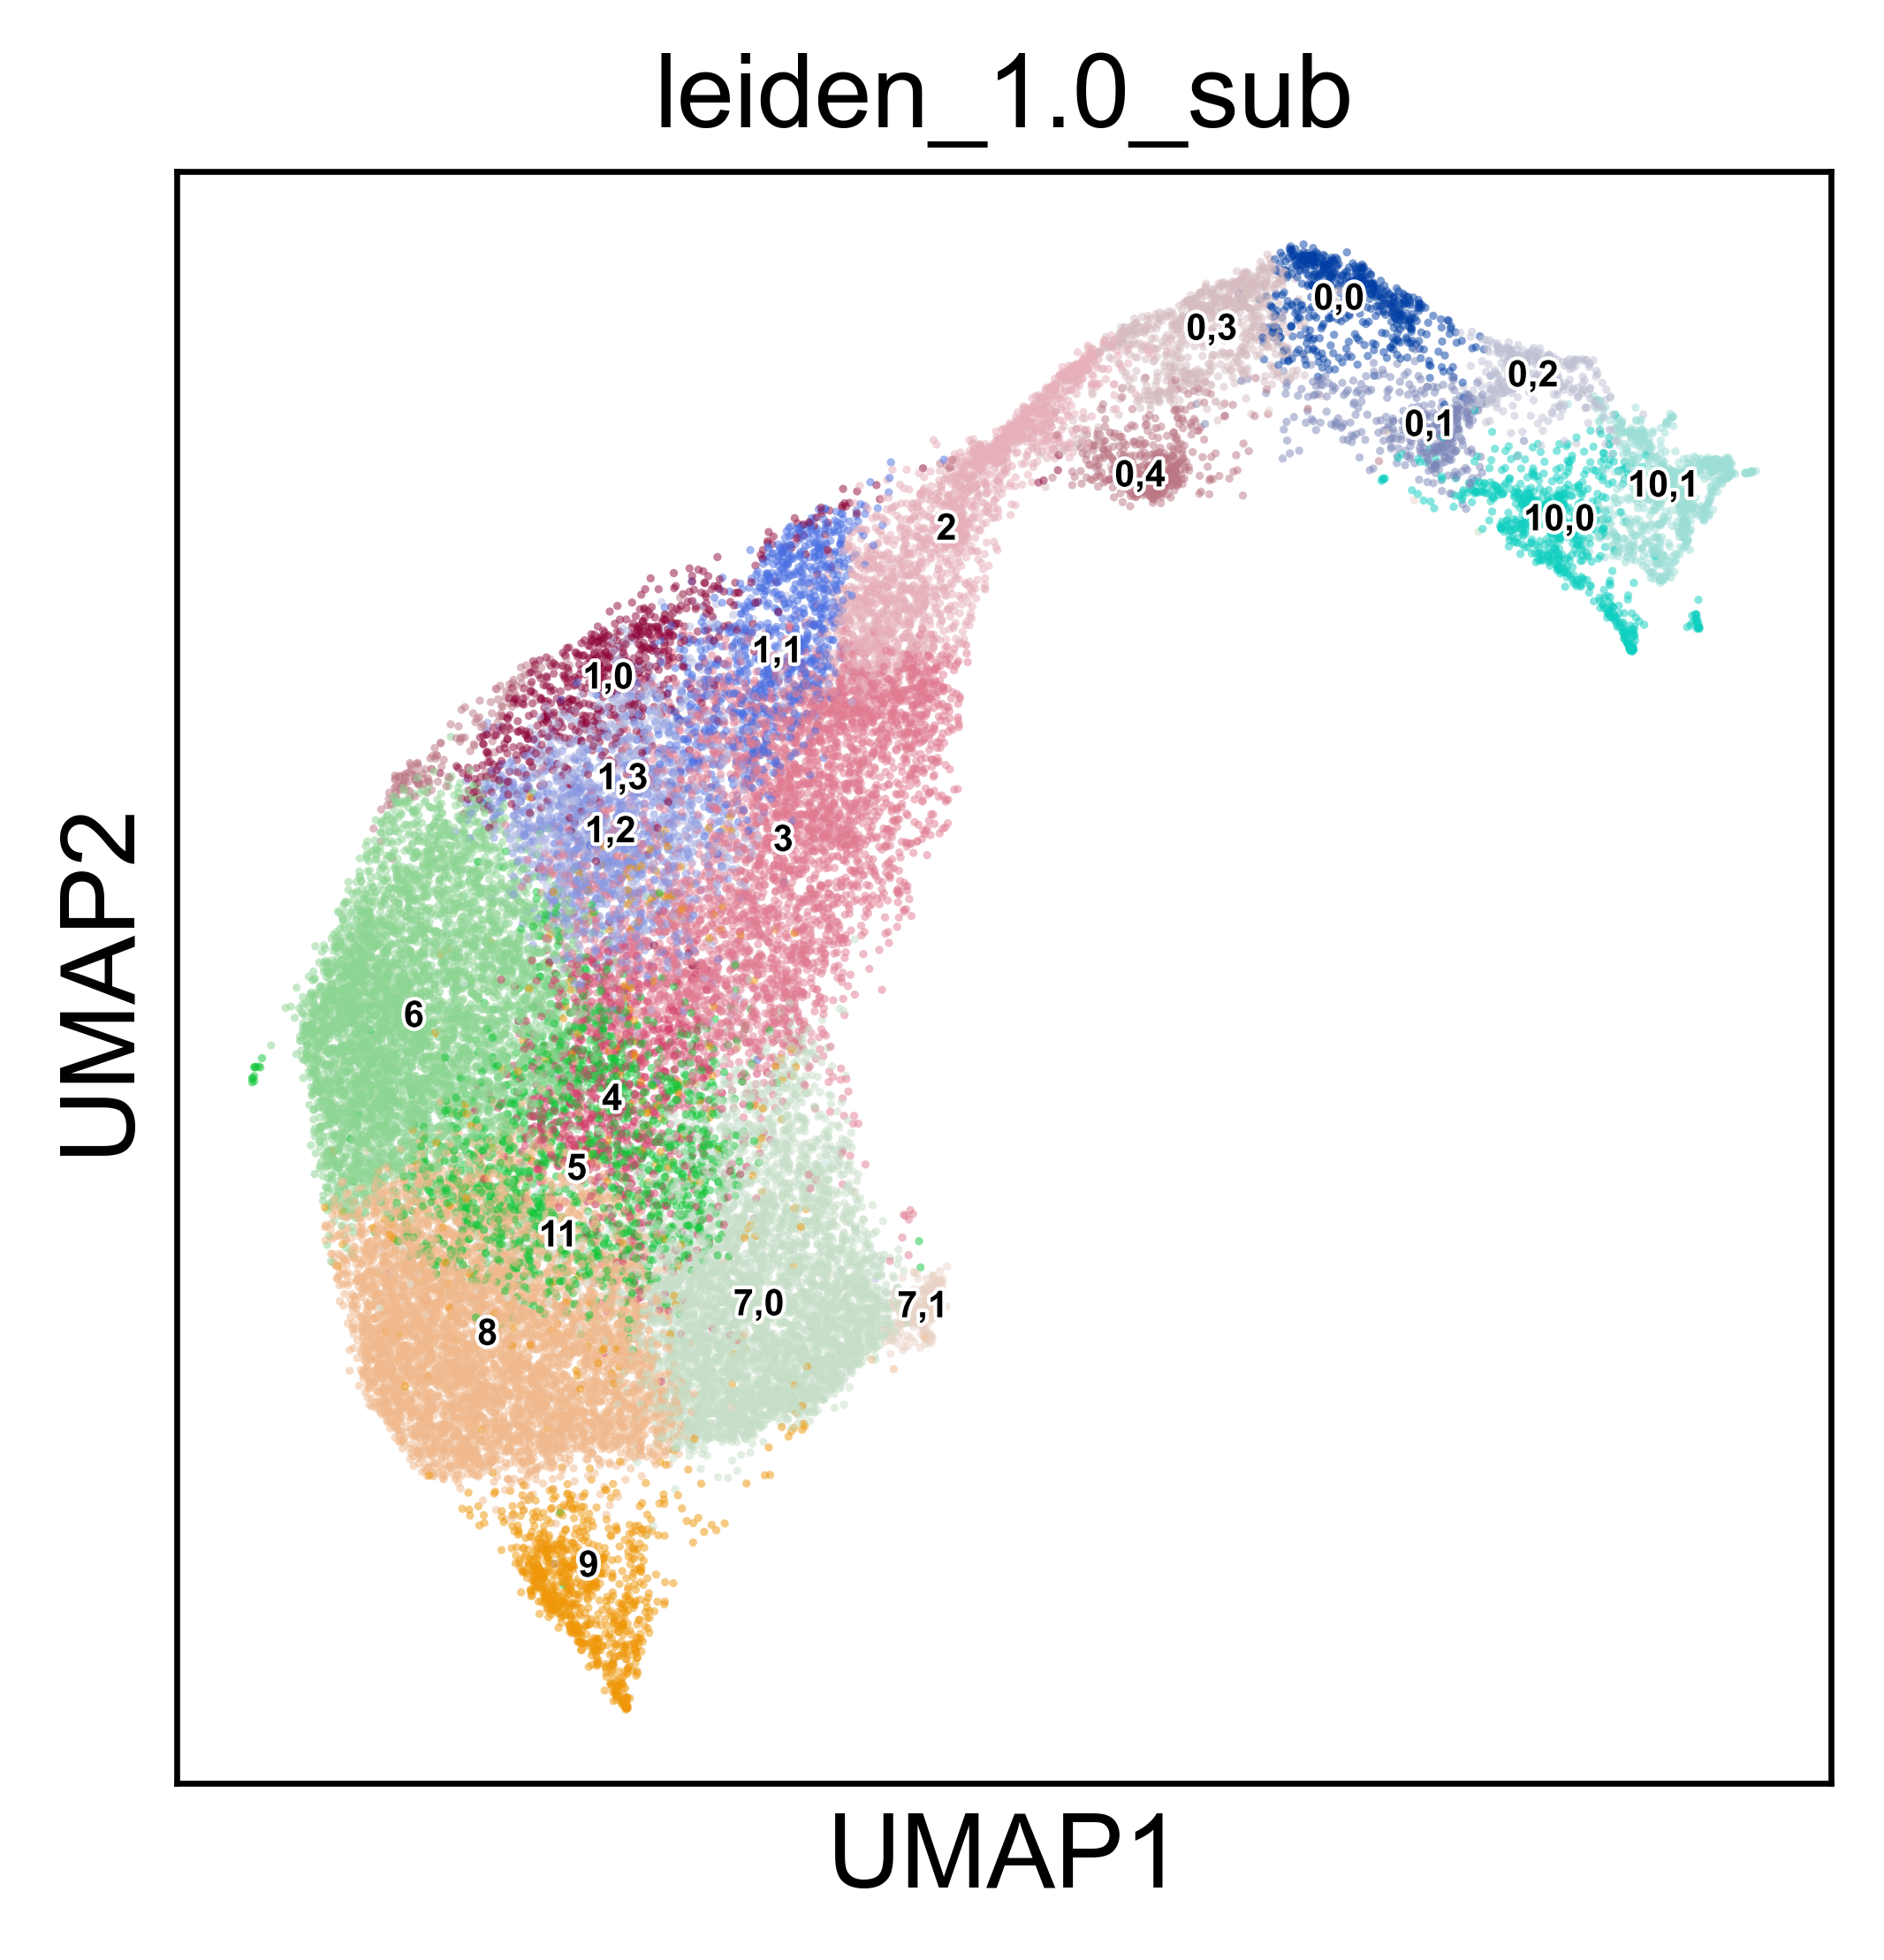

In [19]:
sc.pl.umap(adata, color = ["leiden_1.0_sub"], 
           alpha = 0.5, 
           wspace = 0.5,
           ncols = 3,
           s = 5, 
           legend_loc = "on data", legend_fontsize = 5, legend_fontoutline = True)

In [21]:
for i, x in enumerate(adata.obs["leiden_1.0_sub"].unique()): 
    print(f'"{x}":"N/A ({x})",')

"0,0":"N/A (0,0)",
"1,0":"N/A (1,0)",
"2":"N/A (2)",
"1,1":"N/A (1,1)",
"0,3":"N/A (0,3)",
"7,0":"N/A (7,0)",
"3":"N/A (3)",
"5":"N/A (5)",
"1,2":"N/A (1,2)",
"8":"N/A (8)",
"10,0":"N/A (10,0)",
"4":"N/A (4)",
"10,1":"N/A (10,1)",
"7,1":"N/A (7,1)",
"6":"N/A (6)",
"0,4":"N/A (0,4)",
"9":"N/A (9)",
"1,3":"N/A (1,3)",
"0,1":"N/A (0,1)",
"11":"N/A (11)",
"0,2":"N/A (0,2)",


In [43]:
cell_type_dict = {


# Neutrophils
"0,1":"Precursors of Neutrophils",
"0,2":"Precursors of Neutrophils",
"10,0":"Precursors of Neutrophils",
"10,1":"Precursors of Neutrophils",
"0,0":"Early Immature Neutrophils",
"0,3":"Early Immature Neutrophils",
"2":"Immature Neutrophils",
"1,0":"Immature Neutrophils",
"1,1":"Immature Neutrophils",
"0,4":"Immature Neutrophils",
    
"6":"Mature Neutrophils",
"3":"Mature Neutrophils",
"5":"Mature Neutrophils",
"4":"Mature Neutrophils",
"1,2":"Mature Neutrophils",
"1,3":"Mature Neutrophils",
"4":"Mature Neutrophils",

"7,0":"Aged Neutrophils",
"8":"Aged Neutrophils",
"11":"Aged Neutrophils",


}
#



cell_type_color_palette = {

# purple
"Precursors of Neutrophils": "#84619c",
"Early Immature Neutrophils": "#d658f5",
"Immature Neutrophils": "#9846a8",
"Mature Neutrophils": "#532b6b",
"Aged Neutrophils": "#943886",
#"": "#9a5ce0",
#"": "#c744a8",

}


In [44]:
adata.obs["cell_type_n"] = adata.obs["leiden_1.0_sub"].map(cell_type_dict).astype("category")

/Users/denis/mambaforge/envs/capseq_seurat_v3/lib/python3.12/site-packages/scanpy/plotting/_utils.py:465: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


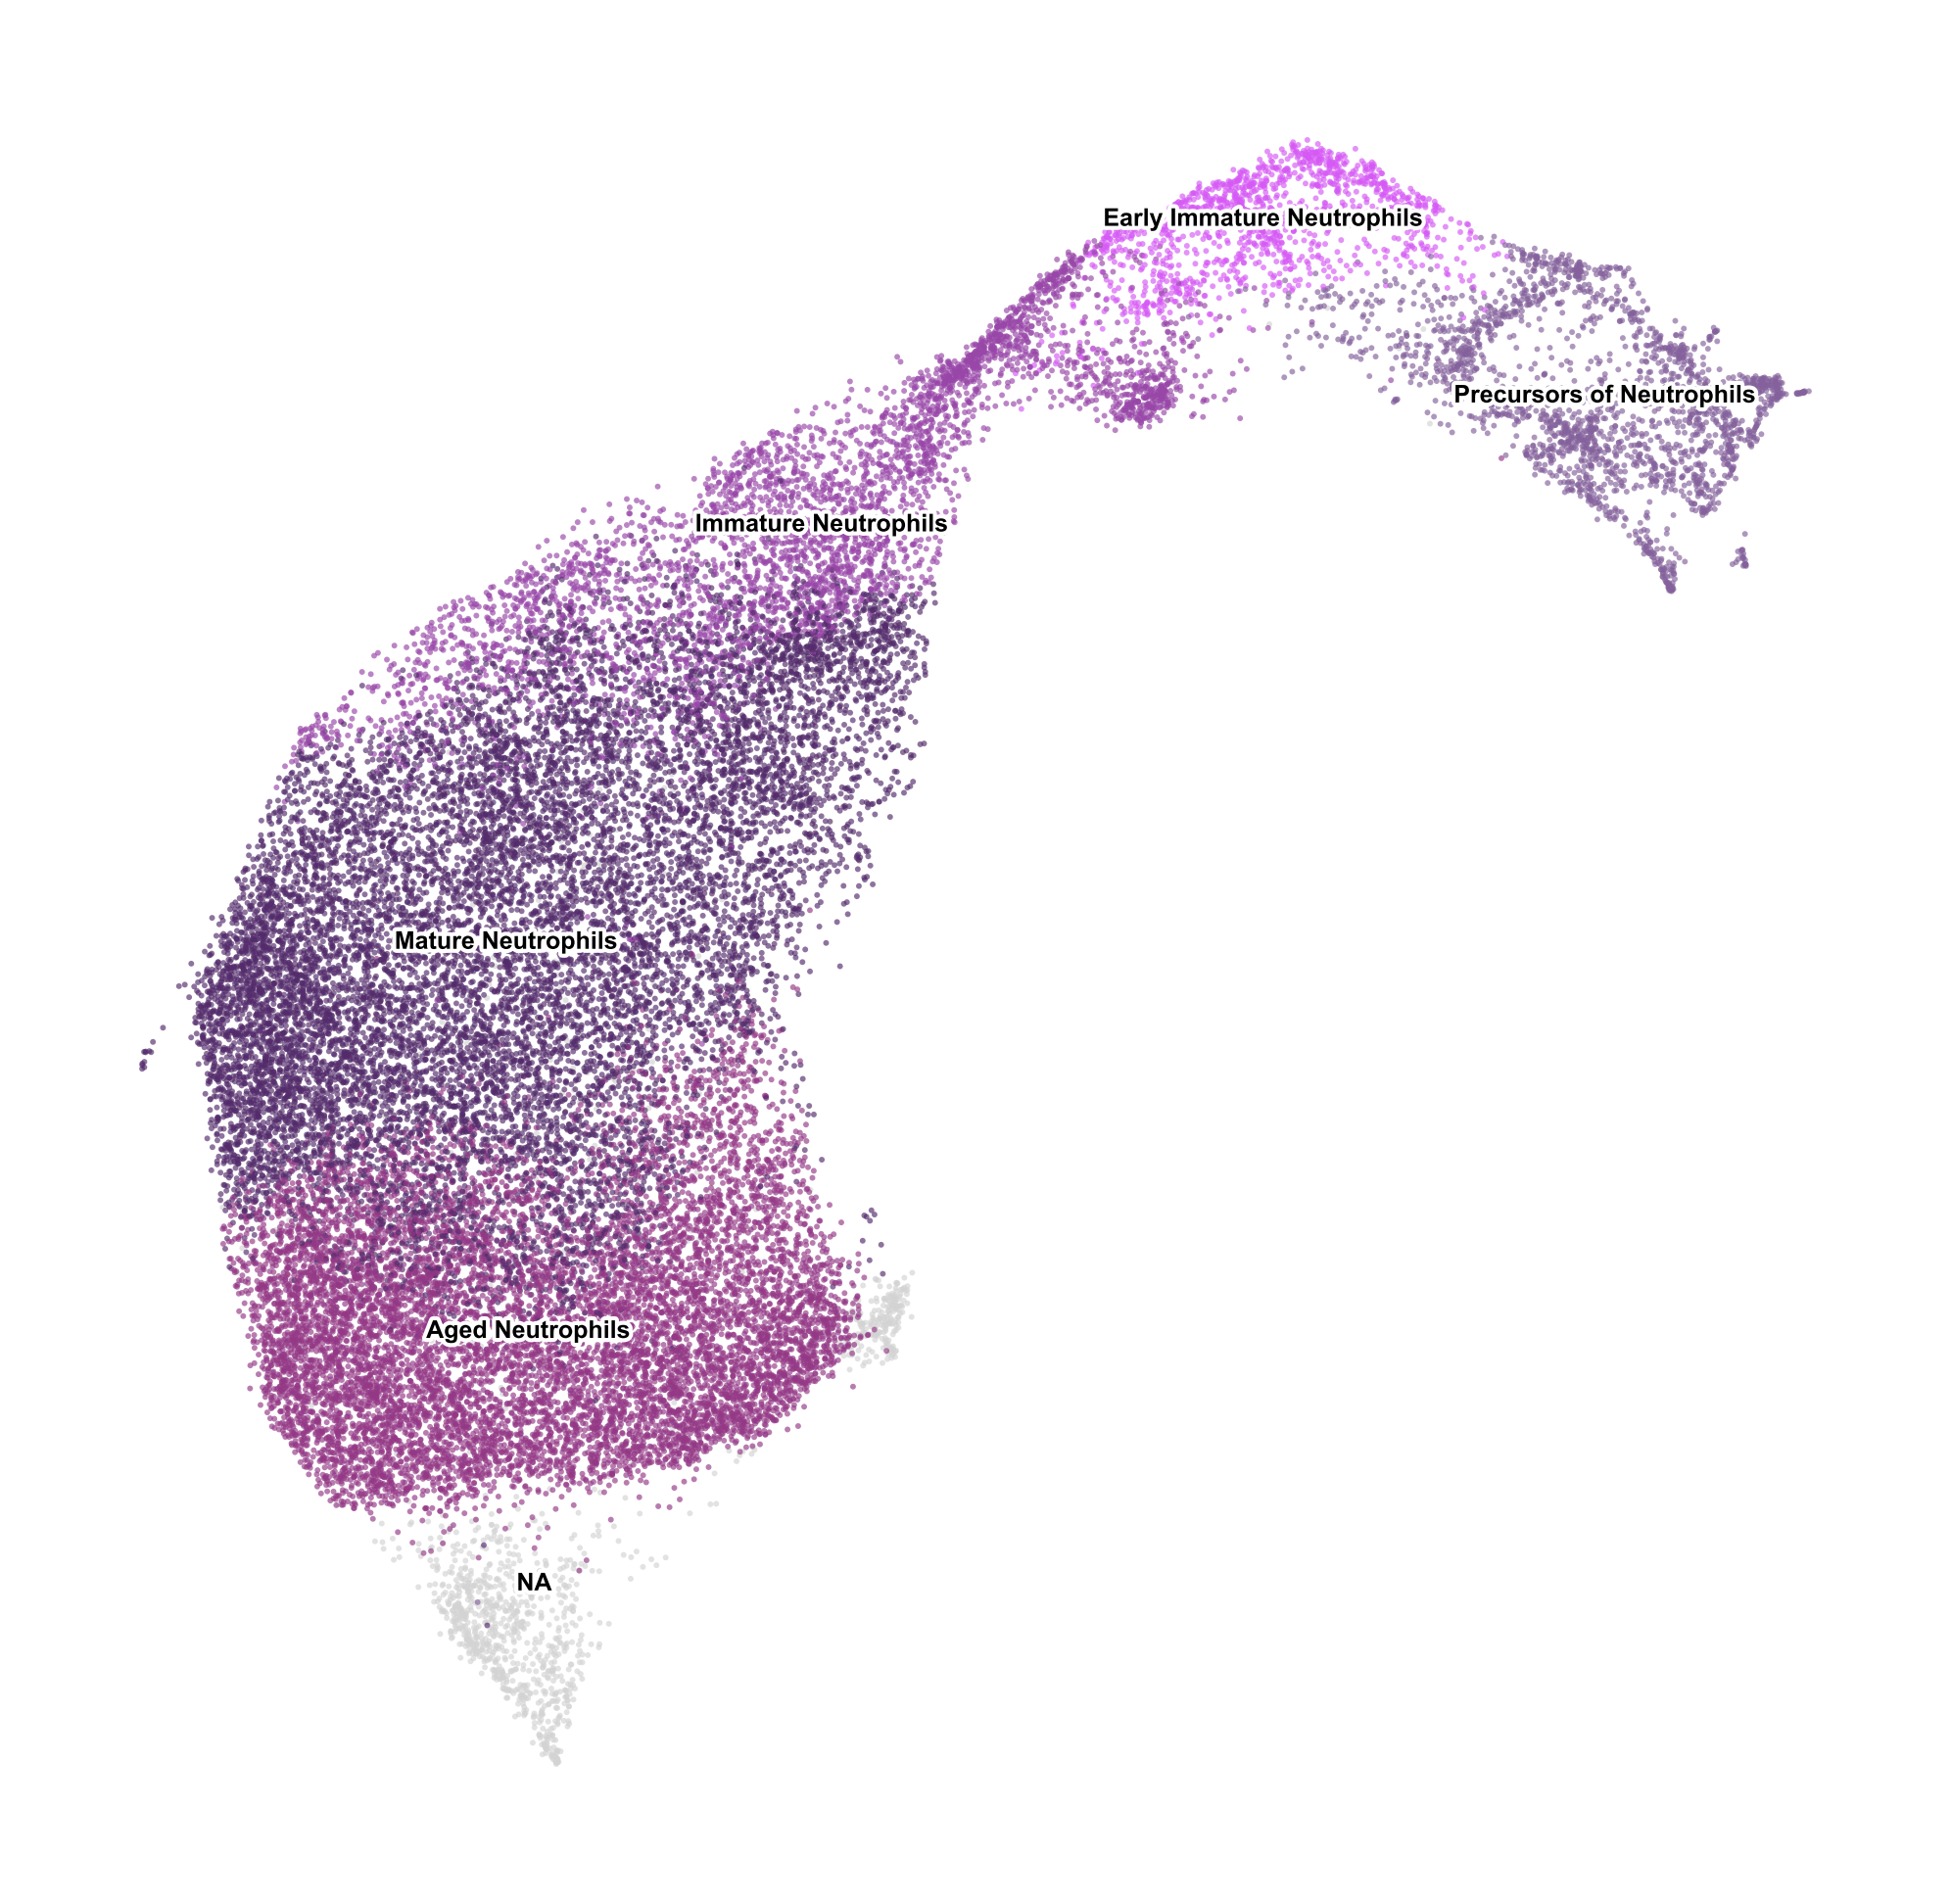

In [211]:
# To randomize cells
np.random.seed(69)
random_indices = np.random.permutation(list(range(adata.shape[0])))


sc.pl.umap(adata[random_indices, :], color = "cell_type_n", 
           alpha = 0.66, 
           wspace = 0.5,
           ncols = 3,
           s = 2, 
           frameon = False, title = "",
           legend_loc = "on data", legend_fontsize = 3, legend_fontoutline = True, 
           palette = cell_type_color_palette, #{"Plasma cells": "red"}, 
           save = "_cell_type_only_neutrophils.png")

In [60]:
# saving annotated recovered adata with raw, log-norm and scaled log-norm counts

current_directory = os.getcwd()
fname1 = current_directory+"/backups/neutrophils_1.0_sub_DGE_v1_annotation_%dx%d_%s.h5ad"%(adata.shape[0],adata.shape[1],now())
print(fname1)
adata.write(fname1)

/Users/denis/microtechnologies/sequencing/240710_BB2_BB3/backups/bb2_bb3_leiden_2.5_sub_DGE_v1_annotation_86447x37733_241024_10h21.h5ad


In [212]:
start = time.time()
# write the pandas dataframe under adata.obs as a separate file
meta = adata.obs
#fname2 = 'backups/obs_info_raw_%dx%d_%s'%(meta.shape[0],meta.shape[1],now())
fname2 = current_directory+"/backups/neutrophils_leiden_1.0_sub_annotation_obs_%dx%d_%s"%(meta.shape[0],meta.shape[1],now())
print(fname2)
save_df(meta,fname2)
print(time.time()-start)

/Users/denis/microtechnologies/sequencing/240710_BB2_BB3/backups/neutrophils_leiden_1.0_sub_annotation_obs_32719x29_241028_11h55
0.4307520389556885
